# Part 3: Cluster analytics
In this part, the data sets are analyzed for cluster. This will help to analyze different behaviors. For this purpose, the k-Means method is used. This measures the quality of clusters and choses the optimal number of K.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.colors as mpc
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.mixture import BayesianGaussianMixture
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

# 1. Cluster analysis for Berlin and Frankfurt

## 1.1 Berlin

In [5]:
# importing data sets 
df = pd.read_csv(r"D:\AA Projekt\aa_project\Data\berlin_final.csv")
df.drop(columns = ["weekday_str", "city", "Unnamed: 0", "day"], inplace = True)

Here the geodata of Berlin are calculated. These are important in order to display the individual starting points of the bicycle rentals as well as the individual end points of the bicycle rentals later in a diagram. In addition, the rental time is converted into minutes and stored in a new variable.  

In [3]:
df_cut = df

#Berlin
df_cut = df_cut[(df_cut["orig_lat"] > 52.3 ) & (df_cut["orig_lat"] < 53)]
df_cut = df_cut[(df_cut["dest_lng"] < 16 ) & (df_cut["dest_lng"] > 12 )]
df_cut = df_cut[(df_cut["dest_lat"] > 52 ) & (df_cut["dest_lat"] < 53)]

df_hour_duration = df_cut

df_start = df_cut[["orig_lat", "orig_lng","dest_lat", "dest_lng"]]

df_td = df_hour_duration[["trip_duration"]] #,"distance"

# df_td['time'] = df_hour_duration.apply(lambda row: row.hour + (row.min/(60)), axis = 1)
df_td['time'] = df_hour_duration.hour + (df_hour_duration['min']/60)

<ipython-input-3-fec610df70b0>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_td['time'] = df_hour_duration.hour + (df_hour_duration['min']/60)


For our analysis of next bikes bicycling behavior, we simply want to see how the data is organized, and this is where clustering comes in.

In [4]:
array = df_td.to_numpy()
array = StandardScaler().fit_transform(array)
kmeans_per_k = [KMeans(n_clusters=k, random_state=42, init='k-means++').fit(array)
                for k in range(2, 12)]

inertias = [model.inertia_ for model in kmeans_per_k]
print(inertias)

[272991.96782648953, 131443.37191329733, 102758.66642420132, 80680.36193795328, 68452.85032700952, 59663.07365587217, 53209.81124494426, 46911.23920788921, 42188.57923669228, 38577.26220360657]


With the help of K-Means, we could identify that four cluster types are optimal for our analysis. The four types of our cluster analysis that we could identify are early drivers, late drivers, short-distance drivers and long-distance drivers.

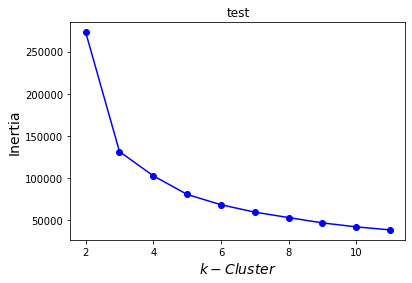

In [5]:
plt.plot(range(2, 12), inertias, "bo-")
plt.title("test")
plt.xlabel("$k-Cluster$", fontsize=14)
plt.ylabel("Inertia", fontsize=14)
plt.show()

We could identify four clusters and categorize it in four colours.The blue cluster (0) forms the group of early drivers. The green cluster (1) forms the group of short distance riders or midday drivers or afternoon riders and the yellow cluster (3) the late drivers. And the red cluster (2) forms the group of long distance riders regardless of time.

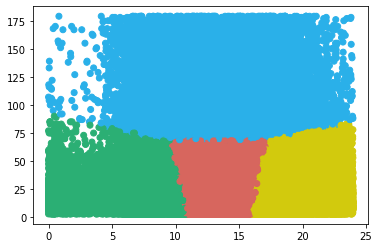

In [6]:
n_clusters = 4
kmeans_cluster = KMeans(n_clusters=n_clusters, init='k-means++')
# array = df_td[:100].to_numpy()
array = df_td.to_numpy()
array = StandardScaler().fit_transform(array)
labels = kmeans_cluster.fit_predict(array)
label_colors = ["#2AB0E9", "#2BAF74", "#D7665E", "#D2CA0D", #blue, green, red, yellow
                "#CCCCCC", "#522A64", "#A3DB05", "#FC6514"]

colors = [label_colors[i] for i in labels]

# plt.scatter(df_td["time"][:100], df_td["trip_duration"][:100], c=colors)
plt.scatter(df_td["time"], df_td["trip_duration"], c=colors)

Here, all coordinates of the starting points of the bicycle rentals of the four different clusters are displayed in a diagram.

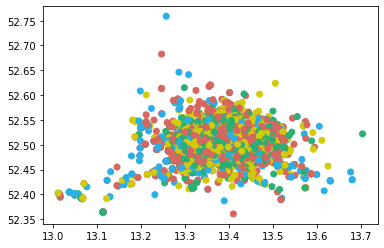

In [7]:
plt.scatter(df_start["orig_lng"], df_start["orig_lat"], c=colors)

Here, all the coordinates of the end points of the bicycle rentals of the four different clusters are displayed in a diagram.

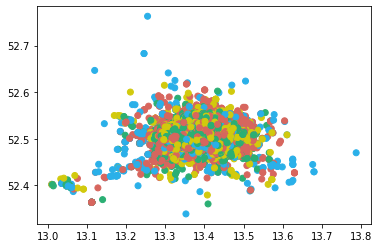

In [8]:
plt.scatter(df_start["dest_lng"], df_start["dest_lat"], c=colors)


For a deeper analysis, we have calculated the values for the individual clusters. Here have put the calculated values of tripcounts, trip_anteil, duration_anteil,duration_mean,distance_anteil and distance mean  for each cluster into the table.

In [9]:
df_cut["cluster"] = labels
df_cut["tripcount"] = 1
df_cut_count = len(df_cut)
df_grouped = df_cut.groupby("cluster").sum()
df_final = df_grouped[["tripcount"]]
df_final["trip_anteil"] = df_final["tripcount"]/df_cut_count
df_final["duration_anteil"] = df_grouped.trip_duration/df_grouped.trip_duration.sum()
df_final["duration_mean"] = df_grouped.trip_duration/df_grouped.tripcount
df_final["distance_anteil"] = df_grouped.distance/df_grouped.distance.sum()
df_final["distance_mean"] = df_grouped.distance/df_grouped.tripcount
df_final

<ipython-input-9-5112fe9cf0c6>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final["trip_anteil"] = df_final["tripcount"]/df_cut_count
<ipython-input-9-5112fe9cf0c6>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final["duration_anteil"] = df_grouped.trip_duration/df_grouped.trip_duration.sum()
<ipython-input-9-5112fe9cf0c6>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the

,tripcount,trip_anteil,duration_anteil,duration_mean,distance_anteil,distance_mean
cluster,,,,,,
0,19391,0.090175,0.343501,113.056676,0.119511,3.069929
1,56088,0.260830,0.169317,19.266349,0.254648,2.261468
2,73059,0.339751,0.276462,24.150727,0.337253,2.299337
3,66499,0.309244,0.210721,20.223733,0.288588,2.161636


## 1.2 Frankfurt (Main):

In [10]:
# importing data sets
df = pd.read_csv(r"D:\AA Projekt\aa_project\Data\frankfurt_final.csv")
df.drop(columns = ["weekday_str", "city", "Unnamed: 0", "day"], inplace = True)

Here the geodata of Frankfurt (Main) are calculated. These are important in order to display the individual starting points of the bicycle rentals as well as the individual end points of the bicycle rentals later in a diagram. In addition, the rental time is converted into minutes and stored in a new variable.

In [11]:
df_cut = df
#Frankfurt
df_cut = df_cut[(df_cut["orig_lat"] > 49 ) & (df_cut["orig_lat"] < 50.3)]
df_cut = df_cut[(df_cut["orig_lng"] > 8.5 ) & (df_cut["orig_lng"] < 8.9)]
df_cut = df_cut[(df_cut["dest_lng"] < 9 ) & (df_cut["dest_lng"] > 8.45 )]


df_hour_duration = df_cut

df_start = df_cut[["orig_lat", "orig_lng","dest_lat", "dest_lng"]]

df_td = df_hour_duration[["trip_duration"]] #,"distance"

# df_td['time'] = df_hour_duration.apply(lambda row: row.hour + (row.min/(60)), axis = 1)
df_td['time'] = df_hour_duration.hour + (df_hour_duration['min']/60)

<ipython-input-11-edd5ca74b573>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_td['time'] = df_hour_duration.hour + (df_hour_duration['min']/60)


With the help of K-Means, we could identify for Frankfurt also, that four cluster types are optimal for our analysis. The four types of our cluster analysis that we could identify are early drivers, late drivers, short-distance drivers and long-distance drivers.

In [12]:
array = df_td.to_numpy()
array = StandardScaler().fit_transform(array)
kmeans_per_k = [KMeans(n_clusters=k, random_state=42, init='k-means++').fit(array)
                for k in range(2, 12)]

inertias = [model.inertia_ for model in kmeans_per_k]
print(inertias)

[25417.48083439154, 12242.597377195738, 9547.797390468826, 7380.453743367875, 6304.567857259812, 5445.9014590525285, 4786.7699568950775, 4176.521772849925, 3779.237845048176, 3422.7762760685405]


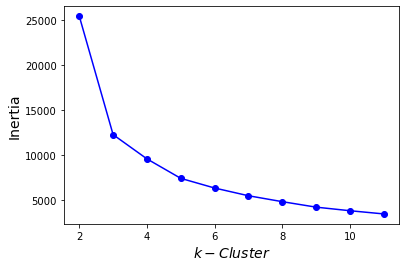

In [13]:
plt.plot(range(2, 12), inertias, "bo-")
plt.xlabel("$k-Cluster$", fontsize=14)
plt.ylabel("Inertia", fontsize=14)
plt.show()


Here we see the optimal number of 4 clusters shown in a diagram, namely early drivers, late drivers, short distance drivers, long distance drivers.

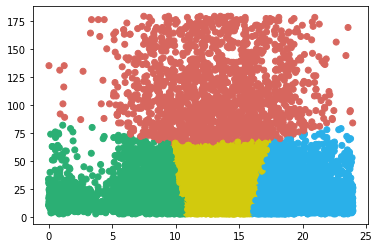

In [14]:
n_clusters = 4
kmeans_cluster = KMeans(n_clusters=n_clusters, init='k-means++')
# array = df_td[:100].to_numpy()
array = df_td.to_numpy()
array = StandardScaler().fit_transform(array)
labels = kmeans_cluster.fit_predict(array)
label_colors = ["#2AB0E9", "#2BAF74", "#D7665E", "#D2CA0D", #blue, green, red, yellow
                "#CCCCCC", "#522A64", "#A3DB05", "#FC6514"]

colors = [label_colors[i] for i in labels]

# plt.scatter(df_td["time"][:100], df_td["trip_duration"][:100], c=colors)
plt.scatter(df_td["time"], df_td["trip_duration"], c=colors)

Here, all coordinates of the starting points of the bicycle rentals of the four different clusters are displayed in a diagram.

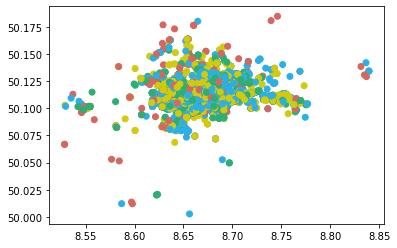

In [15]:
plt.scatter(df_start["orig_lng"], df_start["orig_lat"], c=colors)

Here, all the coordinates of the end points of the bicycle rentals of the four different clusters are displayed in a diagram.

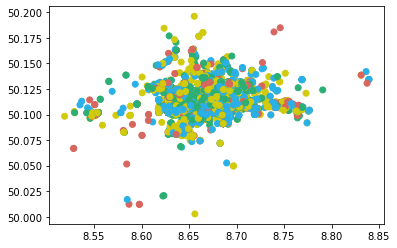

In [16]:
plt.scatter(df_start["dest_lng"], df_start["dest_lat"], c=colors)


Here we have calculated the values of tripcounts, trip_anteil, duration_anteil,duration_mean,distance_anteil and distance mean for each cluster and put the values into the table.


In [17]:
df_cut["cluster"] = labels
df_cut["tripcount"] = 1
df_cut_count = len(df_cut)
df_grouped = df_cut.groupby("cluster").sum()
df_final = df_grouped[["tripcount"]]
df_final["trip_anteil"] = df_final["tripcount"]/df_cut_count
df_final["duration_anteil"] = df_grouped.trip_duration/df_grouped.trip_duration.sum()
df_final["duration_mean"] = df_grouped.trip_duration/df_grouped.tripcount
df_final["distance_anteil"] = df_grouped.distance/df_grouped.distance.sum()
df_final["distance_mean"] = df_grouped.distance/df_grouped.tripcount
df_final

<ipython-input-17-5112fe9cf0c6>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final["trip_anteil"] = df_final["tripcount"]/df_cut_count
<ipython-input-17-5112fe9cf0c6>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final["duration_anteil"] = df_grouped.trip_duration/df_grouped.trip_duration.sum()
<ipython-input-17-5112fe9cf0c6>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in 

,tripcount,trip_anteil,duration_anteil,duration_mean,distance_anteil,distance_mean
cluster,,,,,,
0,6343,0.317467,0.212319,18.940564,0.301610,1.744967
1,5068,0.253654,0.163053,18.205012,0.244128,1.767735
2,1783,0.089239,0.349564,110.936624,0.111255,2.289826
3,6786,0.339640,0.275065,22.936192,0.343007,1.854923
